# Insights from City Supply and Demand Data

## Contents


* [Assignment](#Assigment)
* [Data Exploration](#Data-Exploration)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)
* [Question 5](#Question-5)
* [Question 6](#Question-6)
* [Question 7](#Question-7)
* [Question 8](#Question-8)
* [Question 9](#Question-9)
* [Question 10](#Question-10)
* [Question 11](#Question-11)

### Assigment

Using the provided dataset, answer the following questions:

1. Which date had the most completed trips during the two week period?

2. What was the highest number of completed trips within a 24 hour period?

3. Which hour of the day had the most requests during the two week period?

4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.

8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

10. True or False: There is exactly two weeks of data in this analysis

11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.


### Data Exploration

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv('uber_dataset.csv')
data.head(20)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [123]:
data.iloc[:10]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


Explanation for line 10 = This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012, 11 people opened the Uber app (Eyeballs). 2 of them did not see any car (Zeroes) and 4 of them requested a car (Requests). Of the 4 requests, only 3 complete trips actually resulted (Completed Trips). During this time, there were a total of 6 drivers who logged in (Unique Drivers).

In [124]:
data.shape

(336, 7)

In [125]:
data.describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [127]:
data.isnull().sum()

Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

As you can see, only the "date" column has null values. When we imported the data, we saw that our "date" column constantly assigns a NULL value until the start of the next day. So we will fill our NULL values using forward fill method.

In [128]:
data = data.fillna(method = 'ffill')
data.head(20)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


Column 'Time (Local)' seems hard to understand. I will fix this using Pandas to_datetime function.

In [129]:
data['Time'] = data.apply(lambda x : pd.to_datetime(f"{x['Date']} {x['Time (Local)']}:00"), axis = 1)

In [130]:
data

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00
...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00


## Question 1

1. Which date had the most completed trips during the two week period?

In [131]:
data_question_1 = data.groupby('Date').sum().reset_index()
data_question_1.head(3)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,255,189,26,26,34,138
1,11-Sep-12,276,314,64,40,52,132
2,12-Sep-12,276,423,55,91,114,201


In [132]:
data_question_1.nlargest(1, 'Completed Trips ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


The answer to this question is September 22, 2012

## Question 2

2. What was the highest number of completed trips within a 24 hour period?

The question asks us to create forward 24-hour periods. We can do it by creating FixedForwardWindowIndexer and using it to apply the rolling sum function of pandas.

For some problems knowledge of the future is available for analysis. For example, this occurs when each data point is a full time series read from an experiment, and the task is to extract underlying conditions. In these cases it can be useful to perform forward-looking rolling window computations. FixedForwardWindowIndexer class is available for this purpose. 

In [133]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size = 24)

data_question_2 = data.set_index('Time').rolling(window = indexer , min_periods = 1).sum()
data_question_2

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_1358/4236402302.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data_question_2 = data.set_index('Time').rolling(window = indexer , min_periods = 1).sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Time,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0
...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0


In [134]:
data_question_2.nlargest(1, 'Completed Trips ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Time,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


We found the result as 278.0 Completed Trips dated 2012-09-21 17:00. The 24-hour period of this result will be 2012/09/21 17:00 - 2012/09/22 17:00. Let's see this result more clearly and simply.

In [135]:
data_question_2['24-hour period'] = data_question_2.index.strftime('%Y/%m/%d %H:%S') + ' - ' + (data_question_2.index + pd.Timedelta('24-hours')).strftime('%Y/%m/%d %H:%S')
data_question_2

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,24-hour period
Time,,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0,2012/09/10 07:00 - 2012/09/09 07:00
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0,2012/09/10 08:00 - 2012/09/09 08:00
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0,2012/09/10 09:00 - 2012/09/09 09:00
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0,2012/09/10 10:00 - 2012/09/09 10:00
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0,2012/09/10 11:00 - 2012/09/09 11:00
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,2012/09/24 02:00 - 2012/09/23 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,2012/09/24 03:00 - 2012/09/23 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,2012/09/24 04:00 - 2012/09/23 04:00


In [136]:
print("Number of completed trips : " , data_question_2.nlargest(1, 'Completed Trips ')['Completed Trips '][0])
print("24-hour period            : " , data_question_2.nlargest(1, 'Completed Trips ')['24-hour period'][0])

Number of completed trips :  278.0
24-hour period            :  2012/09/21 17:00 - 2012/09/20 17:00


## Question 3

3. Which hour of the day had the most requests during the two week period?

In [137]:
data_question_3 = data.groupby('Time (Local)').sum().reset_index()
data_question_3.head(3)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,0,339,81,102,142,111
1,1,207,43,71,96,94
2,2,170,52,61,100,62


In [138]:
data_question_3.nlargest(1 , 'Requests ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,488,193,126,184,119


## Question 4

4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [139]:
total_zeroes = data['Zeroes '].sum()
total_zeroes

1429

In [140]:
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek
data['Day'].value_counts()

0    48
1    48
2    48
3    48
4    48
5    48
6    48
Name: Day, dtype: int64

0 = Monday

1 = Tuesday

2 = Wednesday

3 = Thursday

4 = Friday

5 = Saturday

6 = Sunday

In [141]:
weekend_zeroes = data[((data['Day'] == 4) & (data['Time (Local)'] >= 17)) |
                     (data['Day'] == 5) | 
                      (data['Day'] == 6) & (data['Time (Local)'] < 3)]['Zeroes '].sum()
weekend_zeroes

641

In [142]:
data_question_4 = (weekend_zeroes / total_zeroes) * 100 
print(data_question_4.round(2) , "%")

44.86 %


## Question 5

5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [143]:
data_question_5 = data.copy()
data_question_5['completed_trip_ratio_per_driver'] = data_question_5['Completed Trips '] / data_question_5['Unique Drivers']
data_question_5.head(3)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time,Day,completed_trip_ratio_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000


In [144]:
data_without_zero_unique_driver = data_question_5[data_question_5['Unique Drivers'] > 0]

In [145]:
weighted_average = np.average(data_without_zero_unique_driver['completed_trip_ratio_per_driver'],
                                    weights = data_without_zero_unique_driver['Completed Trips '])

weighted_average

0.8282775715092395

## Question 6

6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [146]:
# I will resample our dataset with 8 hours frequency by summing values within each 8 hours shift. 
# I can do it by using the resample(frequency) function from pandas.

In [147]:
data_question_6 = data.set_index("Time").resample('8H').sum()
data_question_6.head(3)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day
Time,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0
2012-09-10 08:00:00,92,78,10,9,11,89,0
2012-09-10 16:00:00,156,106,16,15,21,40,0


In [148]:
data_question_6['8-hour period'] = data_question_6.index.strftime('%Y/%m/%d %H:%M') + '-' + (data_question_6.index + pd.Timedelta('8 hours')).strftime('%Y/%m/%d %H:%M')
data_question_6.head(3)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,8-hour period
Time,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,92,78,10,9,11,89,0,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,156,106,16,15,21,40,0,2012/09/10 16:00-2012/09/11 00:00


In [149]:
data_question_6.nlargest(1, 'Requests ')['8-hour period'][0]

'2012/09/21 16:00-2012/09/22 00:00'

## Question 7

7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.

In [150]:
# According to given statement, if there is an increase in demand, there should be an increase also in supply. 
# We can assume requests are representing the demand. 
# We will calculate the difference in the demand by comparing each hour demand/supply with a previous hour. 
# Pandas .shift( ) function shifts a column upward/downward.
# Then, we will substract the current value of demand/supply from its previous hour value and see the differences as new columns.

In [151]:
data_question_7 = pd.DataFrame(data['Time'])

data_question_7['Request_Difference'] = data['Requests '].shift(-1) - data['Requests ']

data_question_7['Supply_Difference'] = data['Unique Drivers'].shift(-1) - data['Unique Drivers']

data_question_7

,Time,Request_Difference,Supply_Difference
0,2012-09-10 07:00:00,0.0,5.0
1,2012-09-10 08:00:00,-2.0,0.0
2,2012-09-10 09:00:00,1.0,0.0
3,2012-09-10 10:00:00,3.0,-3.0
4,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
331,2012-09-24 02:00:00,-1.0,0.0
332,2012-09-24 03:00:00,-1.0,0.0
333,2012-09-24 04:00:00,1.0,3.0
334,2012-09-24 05:00:00,1.0,4.0


In [152]:
(data_question_7[data_question_7['Request_Difference'] > 0]['Supply_Difference'] > 0).all().item()

False

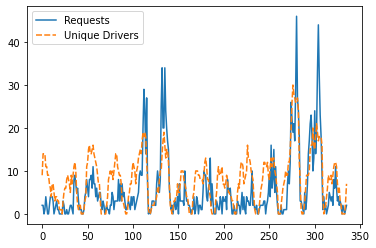

In [153]:
plt.figure()
sns.lineplot(data = data[['Requests ', 'Unique Drivers', 'Time']])
plt.show()

## Question 8

8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [154]:
data_question_8 = data.copy()

In [155]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size = 72)
data_question_8 = data.set_index('Time').rolling(window = indexer, min_periods = 1).sum().reset_index()

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_1358/2782671121.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data_question_8 = data.set_index('Time').rolling(window = indexer, min_periods = 1).sum().reset_index()


The code above calculates the rolling sum for all the timestamps in the dataset by considering everything in 72 hours after each timestamp. Even if it does not exist in our dataset. It'd make sense to filter the dataset so that all 72 hour periods only include the timestamps that exist in the data.

In [156]:
data_question_8 = data_question_8[data_question_8['Time'] <= (data_question_8['Time'].max() - pd.Timedelta(days=3))]

In [157]:
data_question_8['72-hour period'] = data_question_8['Time'].dt.strftime('%Y/%m/%d %H:%M') + '-' + (data_question_8['Time'] + pd.Timedelta('3 days')).dt.strftime('%Y/%m/%d %H:%M')
data_question_8.head(3)

,Time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,72-hour period
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,93.0,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,96.0,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,99.0,2012/09/10 09:00-2012/09/13 09:00


In [158]:
data_question_8['Ratio'] = data_question_8['Zeroes '] / data_question_8['Eyeballs ']
data_question_8.head(3)

,Time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,72-hour period,Ratio
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,93.0,2012/09/10 07:00-2012/09/13 07:00,0.179916
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,96.0,2012/09/10 08:00-2012/09/13 08:00,0.180021
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,99.0,2012/09/10 09:00-2012/09/13 09:00,0.180498


In [159]:
data_question_8.nlargest(1, 'Ratio')['72-hour period']

118    2012/09/15 05:00-2012/09/18 05:00
Name: 72-hour period, dtype: object

## Question 9

9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing

In [160]:
data_question_9 = data.groupby('Time (Local)').sum().reset_index()

In [161]:
data_question_9['Ratio'] = data_question_9['Eyeballs '] / data_question_9['Unique Drivers']
data_question_9.head(3)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Ratio
0,0,339,81,102,142,111,42,3.054054
1,1,207,43,71,96,94,42,2.202128
2,2,170,52,61,100,62,42,2.741935


In [162]:
data_question_9.nlargest(1, 'Ratio')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Ratio
23,23,488,193,126,184,119,42,4.10084


In [163]:
data_question_9.nlargest(1, 'Ratio')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

If I could add 5 drivers at any time of the day during the fortnight period, I would add it to the 23rd hour, 11 pm.

## Question 10

10. True or False: There is exactly two weeks of data in this analysis

In [164]:
# This code will compute the difference between the last and first dates

(data['Time'][data.shape[0] - 1]) - (data['Time'][0])

Timedelta('13 days 23:00:00')

In [165]:
data_question_10 = pd.Timedelta('14 days') == (data['Time'][data.shape[0] - 1]) - (data['Time'][0])
data_question_10

False

As we can see, this dataset is not exactly two weeks.

## Question 11

11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.

In [166]:
# Find the minimum supply and demand per day

data_min_supply_per_day = data.groupby(['Date'])['Unique Drivers'].min().reset_index()
data_min_demand_per_day = data.groupby(['Date'])['Requests '].min().reset_index()

In [167]:
supply_and_demand = pd.merge(data_min_supply_per_day, data_min_demand_per_day , on = 'Date')
supply_and_demand.head(3)

,Date,Unique Drivers,Requests
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0


In [168]:
supply_and_demand = supply_and_demand.rename(columns = {'Unique Drivers' : 'min_supply_per_day' , 'Requests ' : 'min_demand_per_day'}).head(3)

In [169]:
data_question_11 = pd.merge(data, supply_and_demand, on = 'Date')
data_question_11.head(3)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time,Day,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,3,0
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,3,0
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,3,0


Check for exact matches with minimum supply and demand. Output the most occurring time of matched rows using mode()

In [170]:
result = data_question_11[(data_question_11.min_supply_per_day == data_question_11['Unique Drivers']) &
                           (data_question_11.min_demand_per_day == data_question_11['Requests '])]['Time (Local)'].mode()
result

0    3
1    4
2    5
Name: Time (Local), dtype: int64

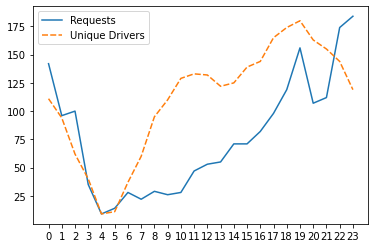

In [171]:
data_question_11_plot = data.groupby('Time (Local)').sum().reset_index()
min_point_value = data_question_11_plot['Requests '][result[0]]
fig = sns.lineplot(data = data_question_11_plot[['Requests ', 'Unique Drivers']])
fig.set_xticks(data_question_11_plot['Time (Local)'])
plt.show()

If we can't make a clear decision from the results, we can graph the result and see that the minimum hour is 4 am.